# introduction

Here, we learn how to make text understandable to machine learning algorithms. 

To use a machine learning algorithm on textual data, we need a numerical or vector representation of text data. Before converting the text data into numerical form, we will need to pass it through some preprocessing steps such as tokenization, stemming, lemmatization, and stop-word removal. 

We will learn these preprocessing steps and how to extract features from the preprocessed text and convert them into vectors. We will explore two popular methods for feature extraction: **Bag of Words** and **Term Frequency-Inverse Document Frequency**, and various
methods for finding similarity between different texts, how text data can be visualized.

# types of data

Two main ways to categorize data: by structure and by content.

## structure

In terms of structure, data can be divided into structured, semi-structured, unstructured.
* Structured data is represented using a tabular format in a csv or excel file.
* Semi-structured data is transformable into a tabular format from markup language (html, xml) files.
* Unstructured data includes text corpora and images. We cannot extract information by simple parsing. We need an algorithm that understands the semantics of language.

## content

In terms of content, data can be text, image, audio, video.

# cleaning text data

Data cleaning is the art of extracting meaningful portions from data by eliminating unnecessary details. Libraries:
* re: standard Python regex library
* textblob: built on top of nltk
* keras: neural network library built on TensorFlow

## tokenization

Tokenization is the process of splitting sentences into their constituents; that is, words and punctuation. 

### text cleaning and tokenization

In [1]:
import re

Create a method that will delete all characters other than digits, alphabetical characters, and whitespaces from the text and split the text into tokens. Replace all non-alphanumeric characters with an empty string:

In [2]:
def clean_text(sentence):
    return re.sub(r'([^\s\w]|_)+', ' ', sentence).split()

In [3]:
sentence = 'Sunil tweeted, "Witnessing 70th Republic Day of India from Rajpath, \
New Delhi. Mesmerizing performance by Indian Army! Awesome airshow! @india_official \
@indian_army #India #70thRepublic_Day. For more photos ping me sunil@photoking.com :)"'
print(clean_text(sentence))

['Sunil', 'tweeted', 'Witnessing', '70th', 'Republic', 'Day', 'of', 'India', 'from', 'Rajpath', 'New', 'Delhi', 'Mesmerizing', 'performance', 'by', 'Indian', 'Army', 'Awesome', 'airshow', 'india', 'official', 'indian', 'army', 'India', '70thRepublic', 'Day', 'For', 'more', 'photos', 'ping', 'me', 'sunil', 'photoking', 'com']


### extracting n-grams

Extract n-grams using three different methods: 
* custom-defined functions
* nltk
* textblob

In [7]:
import re

# custom-defined function

def n_gram_extractor(sentence, n):
    tokenList = []
    tokens = re.sub(r'([^\s\w]|_)+', ' ', sentence).split()
    for i in range(len(tokens)-n+1):
        tokenList.append(tokens[i:i+n])
    return tokenList

print(n_gram_extractor('The cute little boy is playing with the kitten.', 2))

[['The', 'cute'], ['cute', 'little'], ['little', 'boy'], ['boy', 'is'], ['is', 'playing'], ['playing', 'with'], ['with', 'the'], ['the', 'kitten']]


In [8]:
print(n_gram_extractor('The cute little boy is playing with the kitten.', 3))

[['The', 'cute', 'little'], ['cute', 'little', 'boy'], ['little', 'boy', 'is'], ['boy', 'is', 'playing'], ['is', 'playing', 'with'], ['playing', 'with', 'the'], ['with', 'the', 'kitten']]


In [9]:
# nltk

from nltk import ngrams
print(list(ngrams('The cute little boy is playing with the kitten.'.split(), 2)))

[('The', 'cute'), ('cute', 'little'), ('little', 'boy'), ('boy', 'is'), ('is', 'playing'), ('playing', 'with'), ('with', 'the'), ('the', 'kitten.')]


In [10]:
print(list(ngrams('The cute little boy is playing with the kitten.'.split(), 3)))

[('The', 'cute', 'little'), ('cute', 'little', 'boy'), ('little', 'boy', 'is'), ('boy', 'is', 'playing'), ('is', 'playing', 'with'), ('playing', 'with', 'the'), ('with', 'the', 'kitten.')]


In [12]:
# textblob

from textblob import TextBlob
blob = TextBlob("The cute little boy is playing with the kitten.")
print(blob.ngrams(n=2))

[WordList(['The', 'cute']), WordList(['cute', 'little']), WordList(['little', 'boy']), WordList(['boy', 'is']), WordList(['is', 'playing']), WordList(['playing', 'with']), WordList(['with', 'the']), WordList(['the', 'kitten'])]


### tokenizing text with keras and textblob

In [13]:
from keras.preprocessing.text import text_to_word_sequence
from textblob import TextBlob

sentence = 'Sunil tweeted, "Witnessing 70th Republic Day of India from Rajpath, \
New Delhi. Mesmerizing performancesby Indian Army! Awesome airshow! @india_official \
@indian_army #India #70thRepublic_Day. For more photos ping me sunil@photoking.com :)"'

In [14]:
def get_keras_tokens(text):
    return text_to_word_sequence(text)

print(get_keras_tokens(sentence))

['sunil', 'tweeted', 'witnessing', '70th', 'republic', 'day', 'of', 'india', 'from', 'rajpath', 'new', 'delhi', 'mesmerizing', 'performancesby', 'indian', 'army', 'awesome', 'airshow', 'india', 'official', 'indian', 'army', 'india', '70threpublic', 'day', 'for', 'more', 'photos', 'ping', 'me', 'sunil', 'photoking', 'com']


In [15]:
def get_textblob_tokens(text):
    blob = TextBlob(text)
    return blob.words

print(get_textblob_tokens(sentence))

['Sunil', 'tweeted', 'Witnessing', '70th', 'Republic', 'Day', 'of', 'India', 'from', 'Rajpath', 'New', 'Delhi', 'Mesmerizing', 'performancesby', 'Indian', 'Army', 'Awesome', 'airshow', 'india_official', 'indian_army', 'India', '70thRepublic_Day', 'For', 'more', 'photos', 'ping', 'me', 'sunil', 'photoking.com']


## types of tokenizers

nltk provides the following tokenizers:
* Whitespace tokenizer: It splits a string wherever a space, tab, or newline character is present.
* Tweet tokenizer: This is specifically designed for tokenizing tweets. It takes care of all the special characters and emojis used in tweets and returns clean tokens.
* MWE tokenizer: MWE stands for Multi-Word Expression. Here, certain groups of multiple words are treated as one entity during tokenization, such as "United States of America," "People's Republic of China," "not only," and "but also." These predefined groups are added at the beginning with **mwe** methods.
* Regular expression tokenizer: These tokenizers are developed using regular expressions. Sentences are split based on the occurrence of a specific pattern (a regular expression).
* WordPunctTokenizer: This splits a piece of text into a list of alphabetical and non-alphabetical characters. It actually splits text into tokens using a fixed regex, that is, ``'\w+|[^\w\s]+'``.

### tokenizing text using various tokenizers

In [16]:
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import MWETokenizer
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import WhitespaceTokenizer
from nltk.tokenize import WordPunctTokenizer

sentence = 'Sunil tweeted, "Witnessing 70th Republic Day of India from Rajpath, \
New Delhi. Mesmerizing performance by Indian Army! Awesome airshow! @india_official \
@indian_army #India #70thRepublic_Day. For more photos ping me sunil@photoking.com :)"'

In [17]:
def tokenize_with_tweet_tokenizer(text):
    tweet_tokenizer = TweetTokenizer() 
    return tweet_tokenizer.tokenize(text)
    
print(tokenize_with_tweet_tokenizer(sentence))

['Sunil', 'tweeted', ',', '"', 'Witnessing', '70th', 'Republic', 'Day', 'of', 'India', 'from', 'Rajpath', ',', 'New', 'Delhi', '.', 'Mesmerizing', 'performance', 'by', 'Indian', 'Army', '!', 'Awesome', 'airshow', '!', '@india_official', '@indian_army', '#India', '#70thRepublic_Day', '.', 'For', 'more', 'photos', 'ping', 'me', 'sunil@photoking.com', ':)', '"']


The hashtags, emojis, websites, and Twitter IDs are extracted as single tokens. If we had used the white space tokenizer, we would have got hash, dots, and the @ symbol as separate tokens.

In [18]:
def tokenize_with_mwe(text):
    mwe_tokenizer = MWETokenizer([('Republic', 'Day')])
    mwe_tokenizer.add_mwe(('Indian', 'Army'))
    return mwe_tokenizer.tokenize(text.split())

print(tokenize_with_mwe(sentence))

['Sunil', 'tweeted,', '"Witnessing', '70th', 'Republic_Day', 'of', 'India', 'from', 'Rajpath,', 'New', 'Delhi.', 'Mesmerizing', 'performance', 'by', 'Indian', 'Army!', 'Awesome', 'airshow!', '@india_official', '@indian_army', '#India', '#70thRepublic_Day.', 'For', 'more', 'photos', 'ping', 'me', 'sunil@photoking.com', ':)"']


The words "Indian" and "Army!", which should have been treated as a single identity, were treated separately. This is because "Army!" (not "Army") is treated as a token. Let's see how this can be fixed in the next step.

In [19]:
print(tokenize_with_mwe(sentence.replace('!','')))

['Sunil', 'tweeted,', '"Witnessing', '70th', 'Republic_Day', 'of', 'India', 'from', 'Rajpath,', 'New', 'Delhi.', 'Mesmerizing', 'performance', 'by', 'Indian_Army', 'Awesome', 'airshow', '@india_official', '@indian_army', '#India', '#70thRepublic_Day.', 'For', 'more', 'photos', 'ping', 'me', 'sunil@photoking.com', ':)"']


In [20]:
def tokenize_with_regex_tokenizer(text):
    reg_tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
    return reg_tokenizer.tokenize(text)

print(tokenize_with_regex_tokenizer(sentence))

['Sunil', 'tweeted', ',', '"Witnessing', '70th', 'Republic', 'Day', 'of', 'India', 'from', 'Rajpath', ',', 'New', 'Delhi', '.', 'Mesmerizing', 'performance', 'by', 'Indian', 'Army', '!', 'Awesome', 'airshow', '!', '@india_official', '@indian_army', '#India', '#70thRepublic_Day.', 'For', 'more', 'photos', 'ping', 'me', 'sunil', '@photoking.com', ':)"']


In [21]:
def tokenize_with_wst(text):
    wh_tokenizer = WhitespaceTokenizer()
    return wh_tokenizer.tokenize(text)

print(tokenize_with_wst(sentence))

['Sunil', 'tweeted,', '"Witnessing', '70th', 'Republic', 'Day', 'of', 'India', 'from', 'Rajpath,', 'New', 'Delhi.', 'Mesmerizing', 'performance', 'by', 'Indian', 'Army!', 'Awesome', 'airshow!', '@india_official', '@indian_army', '#India', '#70thRepublic_Day.', 'For', 'more', 'photos', 'ping', 'me', 'sunil@photoking.com', ':)"']


In [22]:
def tokenize_with_wordpunct_tokenizer(text):
    wp_tokenizer = WordPunctTokenizer()
    return wp_tokenizer.tokenize(text)

print(tokenize_with_wordpunct_tokenizer(sentence))

['Sunil', 'tweeted', ',', '"', 'Witnessing', '70th', 'Republic', 'Day', 'of', 'India', 'from', 'Rajpath', ',', 'New', 'Delhi', '.', 'Mesmerizing', 'performance', 'by', 'Indian', 'Army', '!', 'Awesome', 'airshow', '!', '@', 'india_official', '@', 'indian_army', '#', 'India', '#', '70thRepublic_Day', '.', 'For', 'more', 'photos', 'ping', 'me', 'sunil', '@', 'photoking', '.', 'com', ':)"']


## stemming

The process of converting a word back into its base form is known as stemming. It is essential to do this, because without it, algorithms would treat two or more different forms of the same word as different entities, despite them having the same semantic meaning.

### RegexpStemmer

RegexpStemmer uses regular expressions to check whether morphological or structural prefixes or suffixes are present.

In [23]:
from nltk.stem import RegexpStemmer

def get_stems(text):
    regex_stemmer = RegexpStemmer('ing$', min=4) 
    return ' '.join([regex_stemmer.stem(wd) for wd in text.split()])

sentence = "I love playing football"
get_stems(sentence)

'I love play football'

### PorterStemmer

The Porter stemmer removes various morphological and inflectional endings (such as suffixes, prefixes, and the plural "s") from English words. 

In [25]:
from nltk.stem.porter import *

sentence = "Before eating it would be nice to sanitize your hands with a sanitizer"

def get_stems(text):
    ps_stemmer = PorterStemmer()
    return ' '.join([ps_stemmer.stem(wd) for wd in text.split()])
 
get_stems(sentence)

'befor eat it would be nice to sanit your hand with a sanit'

Though stemming is a useful technique in NLP, it has a severe drawback. While "eating" has been converted into "eat", "sanitize" has also been converted into "sanit".

## lemmatization

Stemming often generates meaningless words. Lemmatization deals with such cases by using vocabulary and analyzing the words' morphologies. It returns the base forms of words that can be found in dictionaries. 

### performing lemmatization

In [31]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
nltk.download('wordnet')

sentence = '''The products produced by the process
              today are far better than what it produces generally.'''

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ashaynaik/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [32]:
lemmatizer = WordNetLemmatizer()
def get_lemmas(text):
    return ' '.join([lemmatizer.lemmatize(word) \
                     for word in word_tokenize(text)])

get_lemmas(sentence)

'The product produced by the process today are far better than what it produce generally .'

### singularizing and pluralizing words

In [33]:
from textblob import TextBlob
sentence = TextBlob('She sells seashells on the seashore')

def singularize(word):
    return word.singularize()

def pluralize(word):
    return word.pluralize()

sing = singularize(sentence.words[2])

plur = pluralize(sentence.words[5])

print(sing, plur)

seashell seashores


## language translation

The **translate** method of TextBlob can translate text from one language to another.

### language translation

In [34]:
from textblob import TextBlob

def translate(text,from_l,to_l):
    en_blob = TextBlob(text)
    return en_blob.translate(from_lang=from_l, to=to_l)

translate(text='muy bien',from_l='es',to_l='en')

TextBlob("very good")

## stop word removal

nltk and textblob can be used to remove stop words from text. 

### removing stop words from text

In [36]:
from nltk import word_tokenize
sentence = "She sells seashells on the seashore"

def remove_stop_words(text,stop_word_list):
    return ' '.join([word for word in word_tokenize(text) 
                     if word.lower() not in stop_word_list])

custom_stop_word_list = ['she', 'on', 'the', 'am', 'is', 'not']
remove_stop_words(sentence,custom_stop_word_list)

'sells seashells seashore'

### activity: extracting top keywords from the news article

1. Open a Jupyter Notebook.
2. Import nltk and any other necessary libraries.
3. Define some functions to:
    * load the text file, 
    * convert the string into lowercase, 
    * tokenize the text, 
    * remove the stop words, 
    * perform stemming on all the remaining tokens
    * calculate the frequency of all these words.
4. Load news_article.txt using a Python file reader into a single string.
5. Convert the text string into lowercase.
6. Split the string into tokens using a white space tokenizer.
7. Remove any stop words.
8. Perform stemming on all the tokens.
9. Calculate the frequency of all the words after stemming.

In [37]:
import operator

from nltk.tokenize import WhitespaceTokenizer
from nltk import download, stem

# The below statement will download the stop word list
# 'nltk_data/corpora/stopwords/' at home directory of your computer
download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ashaynaik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
def load_file(file_path):
    news = ''.join([line for line in open(file_path,encoding='utf-8')])
    return news

# This method will take string as input and return the string
#  converted into lowercase
def to_lower_case(text):
    return text.lower()

# This will take a text string as input and return the token.
wht = WhitespaceTokenizer()
def tokenize_text(text):
    return wht.tokenize(text=text)

# This will remove stop word tokens from the token list.
stop_words = stopwords.words('english')
def remove_stop_words(token_list):
    return [word for word in token_list if word not in stop_words]

# This will take a token list as input and return stemmed token list
stemmer = stem.PorterStemmer()
def get_stems(token_list):
    return [stemmer.stem(word) for word in token_list]

# This method will generate a dict of word frequencies from list.
def get_freq(stems):
    freq_dict = {}
    for t in stems:
        freq_dict[t.strip()] = freq_dict.get(t.strip(), 0) + 1
    return freq_dict

# This method will sort the dictionary on the values and return the top n 
# keys of the dictionary.
def get_top_n_words(freq_dict, n):
    sorted_dict = sorted(freq_dict.items(), key=operator.itemgetter(1), 
                         reverse=True)
    return [x[0] for x in sorted_dict][:n]

In [39]:
# 4
path = "data/news_article.txt"
news_article = load_file(path)

# 5
lower_case_news_art = to_lower_case(text=news_article)

# 6
tokens = tokenize_text(lower_case_news_art)

# 7
removed_tokens = remove_stop_words(tokens)

# 8
stems = get_stems(removed_tokens)

# 9
freq_dict = get_freq(stems)

top_keywords = get_top_n_words(freq_dict, 6)
top_keywords

['law', 'justic', 'european', 'parti', 'took', 'poland’']

# feature extraction from texts

To convert each textual sentence into a vector, we need to represent it as a set of features. This set of features should uniquely represent the text, though, individually, some of the features may be common across many textual sentences. Features can be classified into two different categories:
1. General features: These features are statistical calculations and do not depend on the content of the text. Some examples of general features could be the number of tokens in the text, the number of characters in the text, and so on.
2. Specific features: These features are dependent on the inherent meaning of the text and represent the semantics of the text. For example, the frequency of unique words in the text is a specific feature.

## extracting general features from raw text

### extracting general features from raw text

These general features include:
* detecting the number of words, 
* the presence of "wh" words 
* the language in which the text is written. 

In [42]:
import pandas as pd
from textblob import TextBlob

df = pd.DataFrame([
    ['The interim budget for 2019 will be announced on 1st February.'], 
    [ '''Do you know how much expectation the middle-class working 
         population is having from this budget?'''], 
    ['February is the shortest month in a year.'], 
    ['This financial year will end on 31st March.']])
df.columns = ['text']
df.head()

,text
0,The interim budget for 2019 will be announced ...
1,Do you know how much expectation the middle-cl...
2,February is the shortest month in a year.
3,This financial year will end on 31st March.


In [48]:
def add_num_words(df):
    df['number_of_words'] = df['text'].apply(lambda x \
                                             : len(TextBlob(str(x)).words))
    return df

add_num_words(df)['number_of_words']

0    11
1    15
2     8
3     8
Name: number_of_words, dtype: int64

The is_present method will find the intersection between set of tokens of
every sentence and the wh_words and will return true if the length of intersection set is non-zero.

In [49]:
def is_present(wh_words, df):
    df['is_wh_words_present'] = df['text'].apply(lambda x : True if \
        len(set(TextBlob(str(x)).words).intersection(wh_words))>0 else False)
    return df

wh_words = set(['why', 'who', 'which', 'what', 'where', 'when', 'how'])

is_present(wh_words, df)['is_wh_words_present']

0    False
1     True
2    False
3    False
Name: is_wh_words_present, dtype: bool

In [50]:
def get_language(df):
    df['language'] = df['text'].apply(lambda x : \
                                      TextBlob(str(x)).detect_language())
    return df

get_language(df)['language']

0    en
1    en
2    en
3    en
Name: language, dtype: object

### extracting general features from text

The dataset that we will be using here consists of random statements. Our objective is to find the frequency of various general features such as punctuation, uppercase and lowercase words, letters, digits, words, and whitespaces.

In [51]:
import pandas as pd
from string import punctuation
import nltk

nltk.download('tagsets')
from nltk.data import load

nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
from nltk import word_tokenize
from collections import Counter

[nltk_data] Downloading package tagsets to
[nltk_data]     /Users/ashaynaik/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ashaynaik/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [52]:
# See what different kinds of PoS nltk provides

def get_tagsets():
    tagdict = load('help/tagsets/upenn_tagset.pickle')
    return list(tagdict.keys())
 
tag_list = get_tagsets()
 
print(tag_list)

['LS', 'TO', 'VBN', "''", 'WP', 'UH', 'VBG', 'JJ', 'VBZ', '--', 'VBP', 'NN', 'DT', 'PRP', ':', 'WP$', 'NNPS', 'PRP$', 'WDT', '(', ')', '.', ',', '``', '$', 'RB', 'RBR', 'RBS', 'VBD', 'IN', 'FW', 'RP', 'JJR', 'JJS', 'PDT', 'MD', 'VB', 'WRB', 'NNP', 'EX', 'NNS', 'SYM', 'CC', 'CD', 'POS']


In [53]:
# This method will count occurrence of pos tags in each sentence.
def get_pos_occurrence_freq(data, tag_list):
    # Get list of sentences in text_list
    text_list = data.text
    
    # create empty dataframe
    feature_df = pd.DataFrame(columns=tag_list)
    for text_line in text_list:
        
        # get pos tags of each word.
        pos_tags = [j for i, j in pos_tag(word_tokenize(text_line))]
        
        # create a dict of pos tags and their frequency in given sentence.
        row = dict(Counter(pos_tags))
        feature_df = feature_df.append(row, ignore_index=True)
    feature_df.fillna(0, inplace=True)
    return feature_df

tag_list = get_tagsets()

data = pd.read_csv('data/data.csv', header=0)
feature_df = get_pos_occurrence_freq(data, tag_list)
feature_df.head()

,LS,TO,VBN,'',WP,UH,VBG,JJ,VBZ,--,...,MD,VB,WRB,NNP,EX,NNS,SYM,CC,CD,POS
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Find the intersection of set of punctuations in text and punctuation set imported from string module of python and find the length of intersection set in each row and add it to column "num_of_unique_punctuations" of data frame.
 

In [54]:
def add_punctuation_count(feature_df, data):

    feature_df['num_of_unique_punctuations'] = data['text']. \
        apply(lambda x: len(set(x).intersection(set(punctuation))))
    return feature_df
 
feature_df = add_punctuation_count(feature_df, data)
 
feature_df['num_of_unique_punctuations'].head()

0    0
1    0
2    1
3    1
4    0
Name: num_of_unique_punctuations, dtype: int64

Tokenize text in every row and create a set of only capital words, then find the length of this set and add it to the column "number_of_capital_words" of dataframe.

In [56]:
def get_capitalized_word_count(feature_df, data):
    feature_df['number_of_capital_words'] = data['text'].\
        apply(lambda x: len([word for word in word_tokenize(str(x)) if word[0].isupper()]))
    return feature_df
 
feature_df = get_capitalized_word_count(feature_df, data)
 
feature_df['number_of_capital_words'].head()

0    1
1    1
2    1
3    1
4    1
Name: number_of_capital_words, dtype: int64

The below code line will tokenize text in every row and create a set of only small words, then find the length of this set and add it to the column "number_of_small_words" of dataframe.

In [57]:
def get_small_word_count(feature_df, data):
    feature_df['number_of_small_words'] = data['text'].\
        apply(lambda x: len([word for word in word_tokenize(str(x)) if word[0].islower()]))
    return feature_df

feature_df = get_small_word_count(feature_df, data)
feature_df['number_of_small_words'].head()

0    4
1    3
2    7
3    3
4    2
Name: number_of_small_words, dtype: int64

In [58]:
def get_number_of_alphabets(feature_df, data):
    # The below code line will break the text line in a list of
    # characters in each row and add the count of that list into
    # the columns `number_of_alphabets`
 
    feature_df['number_of_alphabets'] = data['text']. \
        apply(lambda x: len([ch for ch in str(x) if ch.isalpha()]))
    return feature_df
feature_df = get_number_of_alphabets(feature_df, data)
feature_df['number_of_alphabets'].head()

0    19
1    18
2    28
3    14
4    13
Name: number_of_alphabets, dtype: int64

In [59]:
def get_number_of_digit_count(feature_df, data):
    # The below code line will break the text line in a list of
    # digits in each row and add the count of that list into
    # the columns `number_of_digits`
 
    feature_df['number_of_digits'] = data['text']. \
        apply(lambda x: len([ch for ch in str(x) if ch.isdigit()]))
    return feature_df
feature_df = get_number_of_digit_count(feature_df, data)
feature_df['number_of_digits'].head()

0    0
1    0
2    0
3    0
4    0
Name: number_of_digits, dtype: int64

In [60]:
def get_number_of_words(feature_df, data):
    # The below code line will break the text line in a list of
    # words in each row and add the count of that list into
    # the columns `number_of_digits`
 
    feature_df['number_of_words'] = data['text'].apply(lambda x
                                                       : len(word_tokenize(str(x))))
 
    return feature_df

feature_df = get_number_of_words(feature_df, data)
feature_df['number_of_words'].head()

0    5
1    4
2    9
3    5
4    3
Name: number_of_words, dtype: int64

In [61]:
def get_number_of_whitespaces(feature_df, data):
    # The below code line will generate list of white spaces
    # in each row and add the length of that list into
    # the columns `number_of_white_spaces`
 
    feature_df['number_of_white_spaces'] = data['text']. \
        apply(lambda x: len([ch for ch in str(x) if ch.isspace()]))
 
    return feature_df
 
feature_df = get_number_of_whitespaces(feature_df, data)
feature_df['number_of_white_spaces'].head()

0    4
1    3
2    7
3    3
4    2
Name: number_of_white_spaces, dtype: int64

In [62]:
feature_df.head()

,LS,TO,VBN,'',WP,UH,VBG,JJ,VBZ,--,...,CC,CD,POS,num_of_unique_punctuations,number_of_capital_words,number_of_small_words,number_of_alphabets,number_of_digits,number_of_words,number_of_white_spaces
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,1,4,19,0,5,4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,1,3,18,0,4,3
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,1,7,28,0,9,7
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1,1,3,14,0,5,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0,1,2,13,0,3,2


## bag of words (BoW)

It is a method of extracting features from raw texts. In this technique, we convert each sentence into a vector. The length of this vector is equal to the number of unique words in all the documents. This is done in two steps:
1. The vocabulary or dictionary of all the words is generated.
2. The document is represented in terms of the presence or absence of all words.
A vocabulary or dictionary is created from all the unique possible words available in the corpus (all documents) and every single word is assigned a unique index number. In the second step, every document is represented by a list whose length is equal to the number of words in the vocabulary. 

### creating a bag of words

Create a BoW representation for all the terms in a document and ascertain the 10 most frequent terms. Use **CountVectorizer** module from sklearn, which performs the following tasks:
1. Tokenizes the collection of documents, also called a corpus 
2. Builds the vocabulary of unique words
3. Converts a document into vectors using the previously built vocabulary

In [63]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [64]:
def vectorize_text(corpus):
    """
    Will return a dataframe in which every row will be
    vector representation of a document in corpus
    :param corpus: input text corpus
    :return: dataframe of vectors
    """
    bag_of_words_model = CountVectorizer()
 
    # performs the above described three tasks on the given data corpus.
    dense_vec_matrix = bag_of_words_model.fit_transform(corpus).todense()
    bag_of_word_df = pd.DataFrame(dense_vec_matrix)
    bag_of_word_df.columns = sorted(bag_of_words_model.vocabulary_)
    return bag_of_word_df

corpus = [
        'Data Science is an overlap between Arts and Science',
        'Generally, Arts graduates are right-brained and Science graduates are left-brained',
        'Excelling in both Arts and Science at a time becomes difficult',
        'Natural Language Processing is a part of Data Science']
df = vectorize_text(corpus)
df.head()

,an,and,are,arts,at,becomes,between,both,brained,data,...,language,left,natural,of,overlap,part,processing,right,science,time
0,1,1,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,2,0
1,0,1,2,1,0,0,0,0,2,0,...,0,1,0,0,0,0,0,1,1,0
2,0,1,0,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,1,...,1,0,1,1,0,1,1,0,1,0


In [65]:
def bow_top_n(corpus, n):
    """
      Will return a dataframe in which every row 
      will be represented by presence or absence of top 10 most 
      frequently occurring words in data corpus
      :param corpus: input text corpus
      :return: dataframe of vectors
      """
    bag_of_words_model_small = CountVectorizer(max_features=n)
    bag_of_word_df_small = pd.DataFrame(bag_of_words_model_small.fit_transform(corpus).todense())
    bag_of_word_df_small.columns = sorted(bag_of_words_model_small.vocabulary_)
    return bag_of_word_df_small
df_2 = bow_top_n(corpus, 10)
df_2.head()

,an,and,are,arts,brained,data,graduates,is,right,science
0,1,1,0,1,0,1,0,1,0,2
1,0,1,2,1,2,0,2,0,1,1
2,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,0,1,0,1,0,1


This method only considers the presence and absence of words in a sentence or document—not the frequency of the words/tokens in a document. If we are going to use the semantics of any sentence, the frequency of the words plays an important role. To overcome this issue, there is another feature extraction model called TFIDF.

## Zipf's law

According to Zipf's law, the number of times a word occurs in a corpus is inversely proportional to its rank in the frequency table. In simple terms, if the words in a corpus are arranged in descending order of their frequency of occurrence, then the frequency of the word at the ith rank will be proportional to 1/i:

Frequency of a word = 1 / rank of word in vocabulary

This also means that the frequency of the most frequent word will be twice the frequency of the second most frequent word. 

### Zipf's law

Plot both the expected and actual ranks and frequencies of tokens with the help of Zipf's law. Use the 20newsgroups dataset provided by the sklearn library, which is a collection of newsgroup documents.

In [66]:
from pylab import *
import nltk

nltk.download('stopwords')
from sklearn.datasets import fetch_20newsgroups
from nltk import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import re
import string
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ashaynaik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [67]:
def get_stop_words():
    stop_words = stopwords.words('english')
    stop_words = stop_words + list(string.printable)
    return stop_words

In [68]:
def get_and_prepare_data(stop_words):
    """
    This method will load 20newsgroups data and 
    and remove stop words from it using given stop word list.
    :param stop_words: 
    :return: 
    """
    newsgroups_data_sample = fetch_20newsgroups(subset='train')
    tokenized_corpus = [word.lower() for sentence in newsgroups_data_sample['data'] \
                        for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', sentence)) \
                        if word.lower() not in stop_words]
    return tokenized_corpus

In [69]:
def get_frequency(corpus, n):
    token_count_di = Counter(corpus)
    return token_count_di.most_common(n)

In [70]:
stop_word_list = get_stop_words()
corpus = get_and_prepare_data(stop_word_list)
print(get_frequency(corpus, 50))

[('ax', 62412), ('edu', 21321), ('subject', 12265), ('com', 12134), ('lines', 11835), ('organization', 11233), ('one', 9017), ('would', 8910), ('writes', 7844), ('article', 7438), ('people', 5977), ('like', 5868), ('university', 5589), ('posting', 5507), ('know', 5134), ('get', 4998), ('host', 4996), ('nntp', 4814), ('max', 4776), ('think', 4583), ('also', 4308), ('use', 4187), ('time', 4102), ('new', 3986), ('good', 3759), ('ca', 3546), ('could', 3511), ('well', 3480), ('us', 3364), ('may', 3313), ('even', 3280), ('see', 3065), ('cs', 3041), ('two', 3015), ('way', 3002), ('god', 2998), ('first', 2976), ('many', 2945), ('make', 2894), ('much', 2879), ('system', 2817), ('distribution', 2767), ('right', 2742), ('world', 2724), ('say', 2706), ('want', 2522), ('go', 2474), ('anyone', 2468), ('10', 2466), ('reply', 2463)]


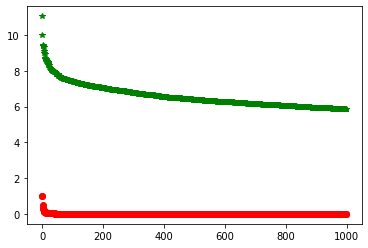

In [71]:
def get_actual_and_expected_frequencies(corpus):
    freq_dict = get_frequency(corpus, 1000)
    actual_frequencies = []
    expected_frequencies = []
    for rank, tup in enumerate(freq_dict):
        actual_frequencies.append(log(tup[1]))
        rank = 1 if rank == 0 else rank
        # expected frequency 1/rank as per zipf’s law
        expected_frequencies.append(1 / rank)
    return actual_frequencies, expected_frequencies
 
def plot(actual_frequencies, expected_frequencies):
    plt.plot(actual_frequencies, 'g*', expected_frequencies, 'ro')
    plt.show()
 
 
# We will plot the actual and expected frequencies
actual_frequencies, expected_frequencies = get_actual_and_expected_frequencies(corpus)
plot(actual_frequencies, expected_frequencies)

Both lines have almost the same slope. In other words, we can say that the lines (or graphs) depict the proportionality of two lists.

## term frequency - inverse document frequency (TFIDF)

TFIDF is a method of representing text data in a vector format. We'll represent each document as a list whose length is equal to the number of unique words/tokens in all documents (corpus), but the vector here not only represents the presence and absence of a word, but also the frequency of the word — both in the current document and the whole corpus.

This technique is based on the idea that the rarely occurring words are better representatives of the document than frequently occurring words. Hence, this representation gives more weightage to the rarer or less frequent words than frequently occurring words. It does so with the following formula:

TFIDF = term frequency x inverse document frequency

Term frequency is the frequency of a word in the given document. <br>
Inverse document frequency can be defined as log(D/df), where df is document frequency and D is the total number of documents in the background corpus.

### TFIDF representation

Represent the input texts with their TFIDF vectors. Use sklearn module TfidfVectorizer, which converts text into TFIDF vectors.

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

def get_tf_idf_vectors(corpus):
    tfidf_model = TfidfVectorizer()
    vector_list = tfidf_model.fit_transform(corpus).todense()
    return vector_list


corpus = [
        'Data Science is an overlap between Arts and Science',
        'Generally, Arts graduates are right-brained and Science graduates are left-brained',
        'Excelling in both Arts and Science at a time becomes difficult',
        'Natural Language Processing is a part of Data Science'
    ]

vector_list = get_tf_idf_vectors(corpus)
print(vector_list)

[[0.40332811 0.25743911 0.         0.25743911 0.         0.
  0.40332811 0.         0.         0.31798852 0.         0.
  0.         0.         0.         0.31798852 0.         0.
  0.         0.         0.40332811 0.         0.         0.
  0.42094668 0.        ]
 [0.         0.159139   0.49864399 0.159139   0.         0.
  0.         0.         0.49864399 0.         0.         0.
  0.24932199 0.49864399 0.         0.         0.         0.24932199
  0.         0.         0.         0.         0.         0.24932199
  0.13010656 0.        ]
 [0.         0.22444946 0.         0.22444946 0.35164346 0.35164346
  0.         0.35164346 0.         0.         0.35164346 0.35164346
  0.         0.         0.35164346 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.18350214 0.35164346]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.30887228 0.         0.
  0.         0.         0.         0.30887228 0.39176